# Preliminary Data Analysis

This notebook contains simple data analysis of game data for a NN that will ideally improve the Elo Model spread predictions. Unfortunately, because the Elo Model already accounts for the point difference, which is reasonably highly correlated with the other features, significant improvement is unlikely until player data is collected and included in the model input. Especially quaterback data.

In [ ]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('../db.sqlite')
cur = conn.cursor()

# get data by joining game and mldata tables
games = cur.execute("""
                    SELECT Games.home_points, Games.away_points,
                    Games.home_pregame_elo, Games.away_pregame_elo, MLData.*
                    FROM Games JOIN MLData on Games.id = MLData.game_id""").fetchall()
conn.close()

In [3]:
games_df = pd.DataFrame(games)
games_df["error"] = games_df.iloc[:,1] - games_df.iloc[:,0] - round((games_df.iloc[:,3] - games_df.iloc[:,2])/25)
games_df["home_point_diff"] = games_df.iloc[:,35:49].mean(axis=1) - games_df.iloc[:,49:63].mean(axis=1)
games_df["away_point_diff"] = games_df.iloc[:,148:162].mean(axis=1) - games_df.iloc[:,162:176].mean(axis=1)
games_df["point_diff_diff"] = games_df["home_point_diff"] - games_df["away_point_diff"]
games_df["home_turnover_diff"] = games_df.iloc[:,91:105].mean(axis=1) - games_df.iloc[:,105:119].mean(axis=1)
games_df["away_turnover_diff"] = games_df.iloc[:,204:218].mean(axis=1) - games_df.iloc[:,218:232].mean(axis=1)
games_df["turnover_diff_diff"] = games_df["home_turnover_diff"] - games_df["away_turnover_diff"]
games_df["home_yard_diff"] = games_df.iloc[:,63:77].mean(axis=1) - games_df.iloc[:,77:91].mean(axis=1)
games_df["away_yard_diff"] = games_df.iloc[:,176:190].mean(axis=1) - games_df.iloc[:,190:204].mean(axis=1)
games_df["yard_diff_diff"] = games_df["home_yard_diff"] - games_df["away_yard_diff"]
games_df["home_elo_diff"] = games_df.iloc[:,7:21].mean(axis=1) - games_df.iloc[:,21:35].mean(axis=1)
games_df["away_elo_diff"] = games_df.iloc[:,120:134].mean(axis=1) - games_df.iloc[:,134:148].mean(axis=1)
games_df["elo_diff_diff"] = games_df["home_elo_diff"] - games_df["away_elo_diff"]
games_df["pred_spread"] = (games_df.iloc[:, 3] - games_df.iloc[:, 2])/25

In [4]:
games_df

,0,1,2,3,4,5,6,7,8,9,...,home_turnover_diff,away_turnover_diff,turnover_diff_diff,home_yard_diff,away_yard_diff,yard_diff_diff,home_elo_diff,away_elo_diff,elo_diff_diff,pred_spread
0,42,34,1531,1479,1,268,1531,1480,1529,1561,...,0.500000,-0.500000,1.000000,-3.500000,2.785714,-6.285714,43.357143,16.142857,27.214286,-2.08
1,13,31,1534,1476,2,269,1534,1530,1475,1505,...,0.285714,0.000000,0.285714,9.357143,-2.785714,12.142857,2.857143,22.500000,-19.642857,-2.32
2,34,7,1531,1479,3,270,1531,1531,1573,1565,...,0.000000,0.428571,-0.428571,10.285714,17.857143,-7.571429,38.785714,15.642857,23.142857,-2.08
3,16,14,1530,1480,4,271,1530,1532,1489,1511,...,0.285714,-1.142857,1.428571,-13.928571,44.000000,-57.928571,17.857143,11.714286,6.142857,-2.00
4,35,7,1529,1481,5,272,1529,1481,1464,1472,...,-0.071429,0.000000,-0.071429,31.142857,25.714286,5.428571,24.285714,38.785714,-14.500000,-1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,23,34,1523,1585,2684,3444,1523,1612,1479,1487,...,-0.285714,0.214286,-0.500000,23.071429,34.642857,-11.571429,27.214286,-1.571429,28.785714,2.48
2684,17,14,1492,1455,2685,3445,1492,1605,1529,1517,...,0.285714,-0.428571,0.714286,-7.214286,-52.500000,45.285714,-23.714286,16.428571,-40.142857,-1.48
2685,12,20,1544,1511,2686,3446,1544,1458,1530,1521,...,0.142857,-0.071429,0.214286,-0.571429,-36.857143,36.285714,-27.357143,20.285714,-47.642857,-1.32
2686,30,24,1455,1504,2687,3447,1455,1438,1481,1490,...,-0.357143,0.142857,-0.500000,3.714286,12.928571,-9.214286,-39.714286,-27.000000,-12.714286,1.96


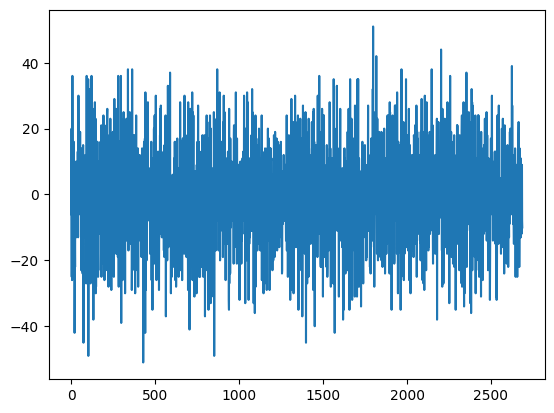

In [7]:
plt.plot(games_df["error"])
# plt.xlim(439,441)

In [10]:
corr = games_df[["error", "elo_diff_diff",
                 "point_diff_diff", "turnover_diff_diff", 
                 "yard_diff_diff", "pred_spread"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,error,elo_diff_diff,point_diff_diff,turnover_diff_diff,yard_diff_diff,pred_spread
error,1.000000,-0.132682,-0.193714,-0.098019,-0.162833,0.049919
elo_diff_diff,-0.132682,1.000000,0.778360,0.519679,0.575697,-0.516007
point_diff_diff,-0.193714,0.778360,1.000000,0.646956,0.718130,-0.666369
turnover_diff_diff,-0.098019,0.519679,0.646956,1.000000,0.184082,-0.466318
yard_diff_diff,-0.162833,0.575697,0.718130,0.184082,1.000000,-0.469643
pred_spread,0.049919,-0.516007,-0.666369,-0.466318,-0.469643,1.000000
